In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#1a
data = pd.read_csv("GlobalLandTemperaturesByState.csv")

data = data[['dt', 'AverageTemperature', 'State']]
data['dt'] = pd.to_datetime(data['dt'])
data = data[data['dt'].dt.year > 2000]

data = data[data['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]

data

,dt,AverageTemperature,State
350773,2001-01-01,-2.592,Nebraska
350774,2001-02-01,-5.575,Nebraska
350775,2001-03-01,2.077,Nebraska
350776,2001-04-01,10.431,Nebraska
350777,2001-05-01,15.878,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [9]:
#1b
data['dt'] = pd.to_datetime(data['dt'])
data = data.groupby('dt')['AverageTemperature'].mean().reset_index()

data

,dt,AverageTemperature
0,2001-01-01,-4.480333
1,2001-02-01,-7.541000
2,2001-03-01,0.590333
3,2001-04-01,7.889000
4,2001-05-01,13.908667
...,...,...
148,2013-05-01,13.196000
149,2013-06-01,18.783667
150,2013-07-01,22.110333
151,2013-08-01,21.890000


Text(0.5, 1.0, 'Average Temperature After 2000')

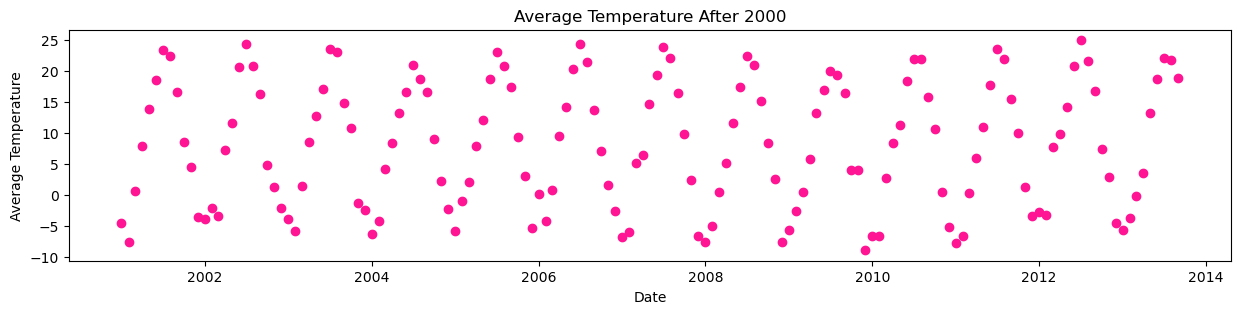

In [212]:
#1c
plt.figure(figsize = (15, 3))
plt.scatter(data['dt'], data['AverageTemperature'], color='deeppink')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature After 2000')

In [530]:
#1d
data['NumericalDate'] = pd.to_datetime(data['dt']).astype('int64') 
#had an error saying that int was not supported but to try int64 instead and that seemed to work  ¯\_(ツ)_/¯

data

,dt,AverageTemperature,NumericalDate
0,2001-01-01,-4.480333,978307200000000000
1,2001-02-01,-7.541000,980985600000000000
2,2001-03-01,0.590333,983404800000000000
3,2001-04-01,7.889000,986083200000000000
4,2001-05-01,13.908667,988675200000000000
...,...,...,...
148,2013-05-01,13.196000,1367366400000000000
149,2013-06-01,18.783667,1370044800000000000
150,2013-07-01,22.110333,1372636800000000000
151,2013-08-01,21.890000,1375315200000000000


In [531]:
#1e
def model(x, a, b, c, d):
    return(a * np.cos(b*x +c)+d)

#tried using cosine forst but it gave a really crackly looking line. 
#sine gave a much smoother line but not sure if that's what we were looking for

InitialGuess = [25e18, .1346e20, 0, 10]



In [532]:
#1f
from scipy.optimize import curve_fit

params, covariance = curve_fit(model, data['NumericalDate'], data['AverageTemperature'], p0 = InitialGuess)

C:\Users\gifte\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 1.0, 'Average Temperature After 2000 w/ Curve Fitting')

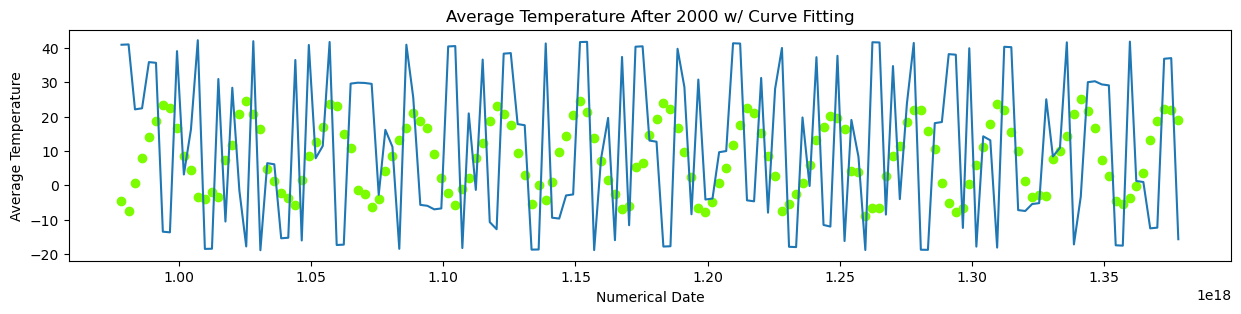

In [533]:
#1g
plt.figure(figsize = (15, 3))
plt.scatter(data['NumericalDate'], data['AverageTemperature'], color='lawngreen')
plt.plot(data['NumericalDate'], model(data['NumericalDate'], *params), label = 'Curve Fitting')
plt.xlabel('Numerical Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature After 2000 w/ Curve Fitting')

In [534]:
#1h
errors = np.sqrt(np.diag(covariance))

In [535]:
#1i
for param, error in zip(params, errors):
    print(f"{param:.2f} +/- {error:.2f}")
    
print(f"{params[0]:.2f} * sin({params[1]:.2f} * x + {params[2]:.2f} + {params[3]:.2f}")

-30.56 +/- inf
13460000000000000000.00 +/- inf
0.00 +/- inf
11.66 +/- inf
-30.56 * sin(13460000000000000000.00 * x + 0.00 + 11.66
